In [1]:
# run this to shorten the data import from the files
path_data = '/home/nero/Documents/Estudos/DataCamp/Python/Supervised_Learning_with_scikit-learn/Data/'
# base modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Deciding on a primary metric

As you have seen, several metrics can be useful to evaluate the performance of classification models, including accuracy, precision, recall, and F1-score.

In this exercise, you will be provided with three different classification problems, and your task is to select the problem where precision is best suited as the primary metric.


A model predicting the presence of cancer as the positive class.

A classifier predicting the positive class of a computer program containing malware.

A model predicting if a customer is a high-value lead for a sales team with limited capacity. (Asnwer)

Correct! With limited capacity, the sales team needs the model to return the highest proportion of true positives compared to all predicted positives, thus minimizing wasted effort.

In [2]:
# importing data for the model
data_path = path_data + 'diabetes_clean.csv'
diabetes_df = pd.read_csv(data_path)
print(diabetes_df.head())

   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age   
0            6      148         72       35        0  33.6  0.627   50  \
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  


In [6]:
# preparing the datasets to train model
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
X = diabetes_df[['bmi', 'age']]
y = diabetes_df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# exercise 01

"""
Assessing a diabetes prediction classifier

In this chapter you'll work with the diabetes_df dataset introduced previously.

The goal is to predict whether or not each individual is likely to have diabetes based on the features body mass index (BMI) and age (in years). Therefore, it is a binary classification problem. A target value of 0 indicates that the individual does not have diabetes, while a value of 1 indicates that the individual does have diabetes.

diabetes_df has been preloaded for you as a pandas DataFrame and split into X_train, X_test, y_train, and y_test. In addition, a KNeighborsClassifier() has been instantiated and assigned to knn.

You will fit the model, make predictions on the test set, then produce a confusion matrix and classification report.
"""

# Instructions

"""

    Import confusion_matrix and classification_report.
    Fit the model to the training data.
    Predict the labels of the test set, storing the results as y_pred.
    Compute and print the confusion matrix and classification report for the test labels versus the predicted labels.

"""

# solution

# Import confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#----------------------------------#

# Conclusion

"""
Excellent! The model produced 34 true positives and 35 false positives, meaning precision was less than 50%, which is confirmed in the classification report. The output also shows a better F1-score for the zero class, which represents individuals who do not have diabetes.
"""

[[116  35]
 [ 46  34]]
              precision    recall  f1-score   support

           0       0.72      0.77      0.74       151
           1       0.49      0.42      0.46        80

    accuracy                           0.65       231
   macro avg       0.60      0.60      0.60       231
weighted avg       0.64      0.65      0.64       231



'\nExcellent! The model produced 34 true positives and 35 false positives, meaning precision was less than 50%, which is confirmed in the classification report. The output also shows a better F1-score for the zero class, which represents individuals who do not have diabetes.\n'

In [8]:
# preparing the model for training data
X = diabetes_df.drop('diabetes', axis = 1)
y = diabetes_df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# exercise 02

"""
Building a logistic regression model

In this exercise, you will build a logistic regression model using all features in the diabetes_df dataset. The model will be used to predict the probability of individuals in the test set having a diabetes diagnosis.

The diabetes_df dataset has been split into X_train, X_test, y_train, and y_test, and preloaded for you.
"""

# Instructions

"""

    Import LogisticRegression.
    Instantiate a logistic regression model, logreg.
    Fit the model to the training data.
    Predict the probabilities of each individual in the test set having a diabetes diagnosis, storing the array of positive probabilities as y_pred_probs.

"""

# solution

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression(max_iter=len(diabetes_df))

# Fit the model
logreg.fit(X_train, y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print(y_pred_probs[:10])

#----------------------------------#

# Conclusion

"""
Nicely done! Notice how the probability of a diabetes diagnosis for the first 10 individuals in the test set ranges from 0.01 to 0.79. Now let's plot the ROC curve to visualize performance using different thresholds.
"""

[0.26656619 0.19010665 0.1235877  0.14565317 0.50460975 0.45336229
 0.01327809 0.59615896 0.56323694 0.79996745]


"\nNicely done! Notice how the probability of a diabetes diagnosis for the first 10 individuals in the test set ranges from 0.01 to 0.79. Now let's plot the ROC curve to visualize performance using different thresholds.\n"

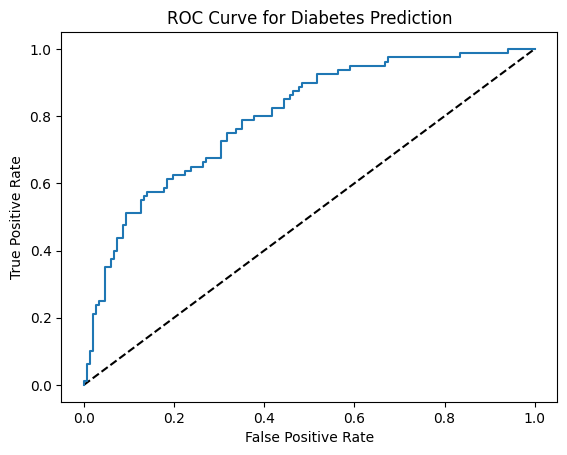

'\nWell done! The ROC curve is above the dotted line, so the model performs better than randomly guessing the class of each observation.\n'

In [12]:
# exercise 03

"""
The ROC curve

Now you have built a logistic regression model for predicting diabetes status, you can plot the ROC curve to visualize how the true positive rate and false positive rate vary as the decision threshold changes.

The test labels, y_test, and the predicted probabilities of the test features belonging to the positive class, y_pred_probs, have been preloaded for you, along with matplotlib.pyplot as plt.

You will create a ROC curve and then interpret the results.
"""

# Instructions

"""

    Import roc_curve.
    Calculate the ROC curve values, using y_test and y_pred_probs, and unpacking the results into fpr, tpr, and thresholds.
    Plot true positive rate against false positive rate.
---
Question

Well done on producing the ROC curve for the diabetes prediction model.

But, what does the plot tell you about the model's performance?
Possible Answers

    The model is about as good as randomly guessing the class of each observation.
    The model is much worse than randomly guessing the class of each observation.
    The model is much better than randomly guessing the class of each observation. (Answer)
    It is not possible to conclude whether the model performs better or worse than randomly guessing the class of each observation.
"""

# solution

# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

#----------------------------------#

# Conclusion

"""
Well done! The ROC curve is above the dotted line, so the model performs better than randomly guessing the class of each observation.
"""

In [13]:
# exercise 04

"""
ROC AUC

The ROC curve you plotted in the last exercise looked promising.

Now you will compute the area under the ROC curve, along with the other classification metrics you have used previously.

The confusion_matrix and classification_report functions have been preloaded for you, along with the logreg model you previously built, plus X_train, X_test, y_train, y_test. Also, the model's predicted test set labels are stored as y_pred, and probabilities of test set observations belonging to the positive class stored as y_pred_probs.

A knn model has also been created and the performance metrics printed in the console, so you can compare the roc_auc_score, confusion_matrix, and classification_report between the two models.
"""

# Instructions

"""

    Import roc_auc_score.
    Calculate and print the ROC AUC score, passing the test labels and the predicted positive class probabilities.
    Calculate and print the confusion matrix.
    Call classification_report().

"""

# solution

# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

#----------------------------------#

# Conclusion

"""
Did you notice that logistic regression performs better than the KNN model across all the metrics you calculated? A ROC AUC score of 0.8002 means this model is 60% better than a chance model at correctly predicting labels! scikit-learn makes it easy to produce several classification metrics with only a few lines of code.
"""

0.7964403973509933
[[116  35]
 [ 46  34]]
              precision    recall  f1-score   support

           0       0.72      0.77      0.74       151
           1       0.49      0.42      0.46        80

    accuracy                           0.65       231
   macro avg       0.60      0.60      0.60       231
weighted avg       0.64      0.65      0.64       231



'\nDid you notice that logistic regression performs better than the KNN model across all the metrics you calculated? A ROC AUC score of 0.8002 means this model is 60% better than a chance model at correctly predicting labels! scikit-learn makes it easy to produce several classification metrics with only a few lines of code.\n'

In [18]:
# preparing the models for fiting and parameter optimization
from sklearn.model_selection import KFold
# Create a KFold object
kf = KFold(n_splits=5, random_state=42, shuffle=True)

from sklearn.linear_model import Lasso
lasso = Lasso()

In [20]:
# exercise 05

"""
Hyperparameter tuning with GridSearchCV

Now you have seen how to perform grid search hyperparameter tuning, you are going to build a lasso regression model with optimal hyperparameters to predict blood glucose levels using the features in the diabetes_df dataset.

X_train, X_test, y_train, and y_test have been preloaded for you. A KFold() object has been created and stored for you as kf, along with a lasso regression model as lasso.
"""

# Instructions

"""

    Import GridSearchCV.
    Set up a parameter grid for "alpha", using np.linspace() to create 20 evenly spaced values ranging from 0.00001 to 1.
    Call GridSearchCV(), passing lasso, the parameter grid, and setting cv equal to kf.
    Fit the grid search object to the training data to perform a cross-validated grid search.

"""

# solution

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Set up the parameter grid
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}

# Instantiate lasso_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train, y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

#----------------------------------#

# Conclusion

"""
Well done! Unfortunately, the best model only has an R-squared score of 0.33, highlighting that using the optimal hyperparameters does not guarantee a high performing model!
"""

Tuned lasso paramaters: {'alpha': 1e-05}
Tuned lasso score: 0.29604708033272703


'\nWell done! Unfortunately, the best model only has an R-squared score of 0.33, highlighting that using the optimal hyperparameters does not guarantee a high performing model!\n'

In [27]:
# modfy the logreg model solver to accept the l1 penalty
logreg = LogisticRegression(solver='liblinear')

In [28]:
# exercise 06

"""
Hyperparameter tuning with RandomizedSearchCV

As you saw, GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space. In this case, you can use RandomizedSearchCV, which tests a fixed number of hyperparameter settings from specified probability distributions.

Training and test sets from diabetes_df have been pre-loaded for you as X_train. X_test, y_train, and y_test, where the target is "diabetes". A logistic regression model has been created and stored as logreg, as well as a KFold variable stored as kf.

You will define a range of hyperparameters and use RandomizedSearchCV, which has been imported from sklearn.model_selection, to look for optimal hyperparameters from these options.
"""

# Instructions

"""

    Create params, adding "l1" and "l2" as penalty values, setting C to a range of 50 float values between 0.1 and 1.0, and class_weight to either "balanced" or a dictionary containing 0:0.8, 1:0.2.
    Create the Randomized Search CV object, passing the model and the parameters, and setting cv equal to kf.
    Fit logreg_cv to the training data.
    Print the model's best parameters and accuracy score.

"""

# solution

# Create the parameter space
params = {"penalty": ["l2","l1"],
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.1, 1.0, 50),
         "class_weight": ["balanced", {0:0.8, 1:0.2}]}

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)

# Fit the data to the model
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

#----------------------------------#

# Conclusion

"""
Great searching! Even without exhaustively trying every combination of hyperparameters, the model has an accuracy of over 70% on the test set! So far we have worked with clean datasets; however, in the next chapter, we will discuss the steps required to transform messy data before building supervised learning models.
"""

Tuned Logistic Regression Parameters: {'tol': 0.10213061224489796, 'penalty': 'l1', 'class_weight': 'balanced', 'C': 0.2653061224489796}
Tuned Logistic Regression Best Accuracy Score: 0.7467289719626169


'\nGreat searching! Even without exhaustively trying every combination of hyperparameters, the model has an accuracy of over 70% on the test set! So far we have worked with clean datasets; however, in the next chapter, we will discuss the steps required to transform messy data before building supervised learning models.\n'